# Price prediction using Facebook Prophet

This project focuses on predicting the price of the avocado in the US in the upcoming year using time series analysis. The Facebook Prophet library is used here.
More details on the library can be found on: https://facebook.github.io/prophet/

### Import libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import fbprophet as Prophet

### Importing the data

In [36]:
avocado_df = pd.read_csv('avocado.csv')

In [37]:
avocado_df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [38]:
avocado_df.describe

<bound method NDFrame.describe of        Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.

In [39]:
avocado_df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [40]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Lets check if there are any null values

In [41]:
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### Exploring the dataset

Sorting the entries with respect to Date column

In [42]:
avocado_df = avocado_df.sort_values('Date')

In [43]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


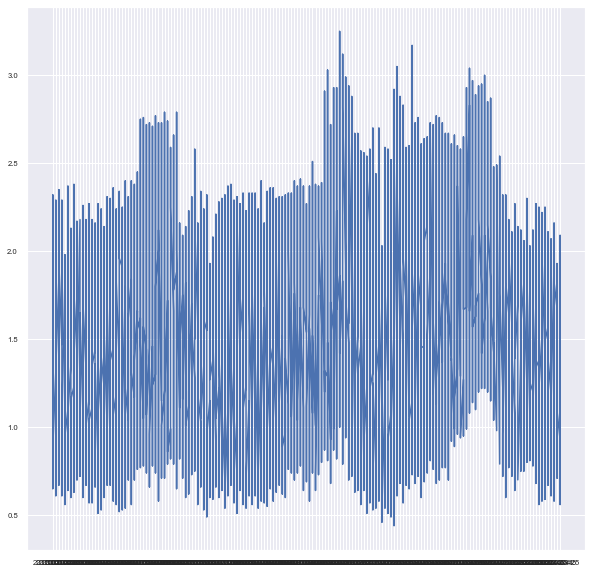

In [44]:
# Plot data and average price
plt.figure(figsize = (10,10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

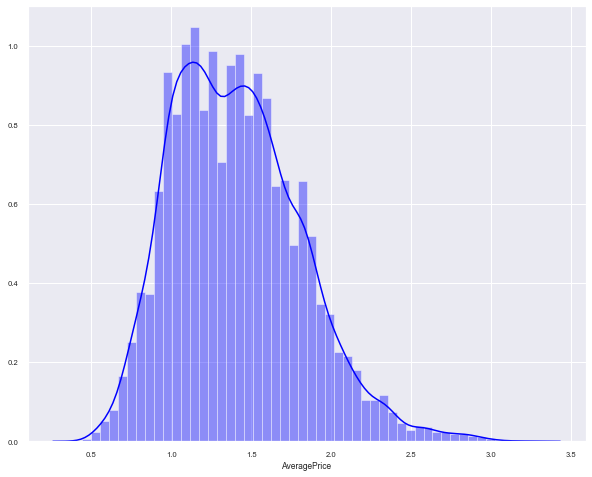

In [45]:
#Plot distribution of the average price
plt.figure(figsize = (10,8))
sns.distplot(avocado_df['AveragePrice'], color = 'blue')

So from the above plot we can incurr that the average price is between 1.4-1.5 and the least price was 0.5 and the highest price was nearly 3.0.

Let us plot a violin plot between the average price and the type of avocado to get to know what type had more sales or more profit

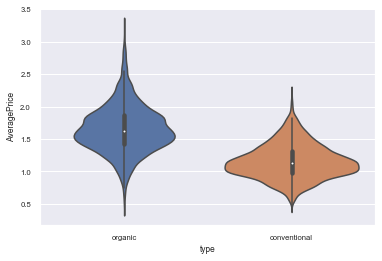

In [46]:
sns.violinplot(x = 'type', y ='AveragePrice', data = avocado_df)

From the above plot we can observe that the average price of organic type is higher than the conventional type. The distribution of the plot looks better in organic type than the conventional.

Region wise analysis:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text xticklabel objects>)

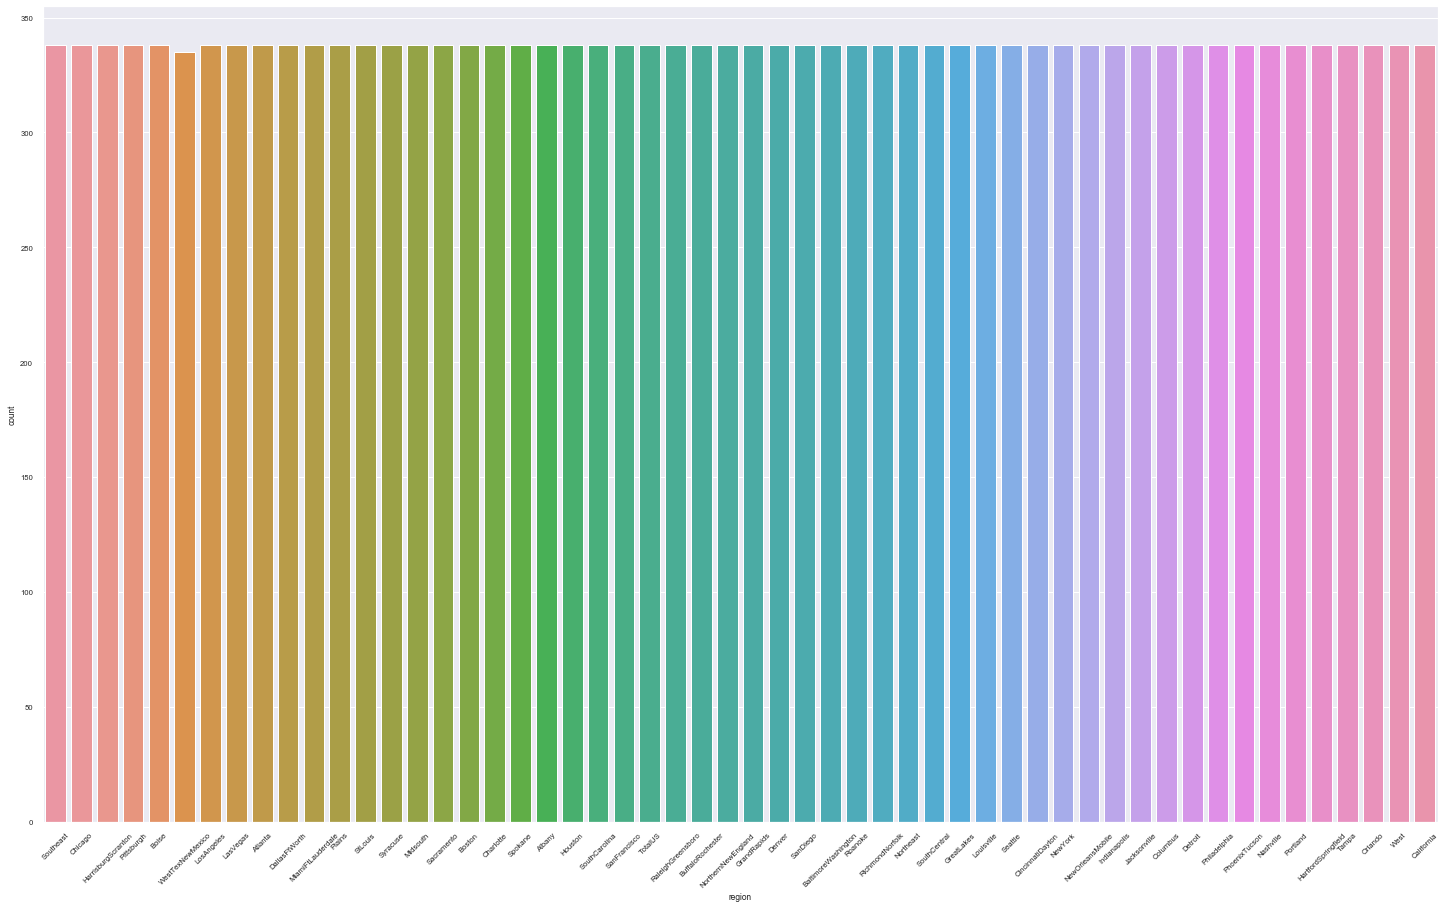

In [47]:
#Bar chart to indicate the number of regions
sns.set(font_scale = 0.7)
plt.figure(figsize = [25,15])
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation =45)

year wise analysis:

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

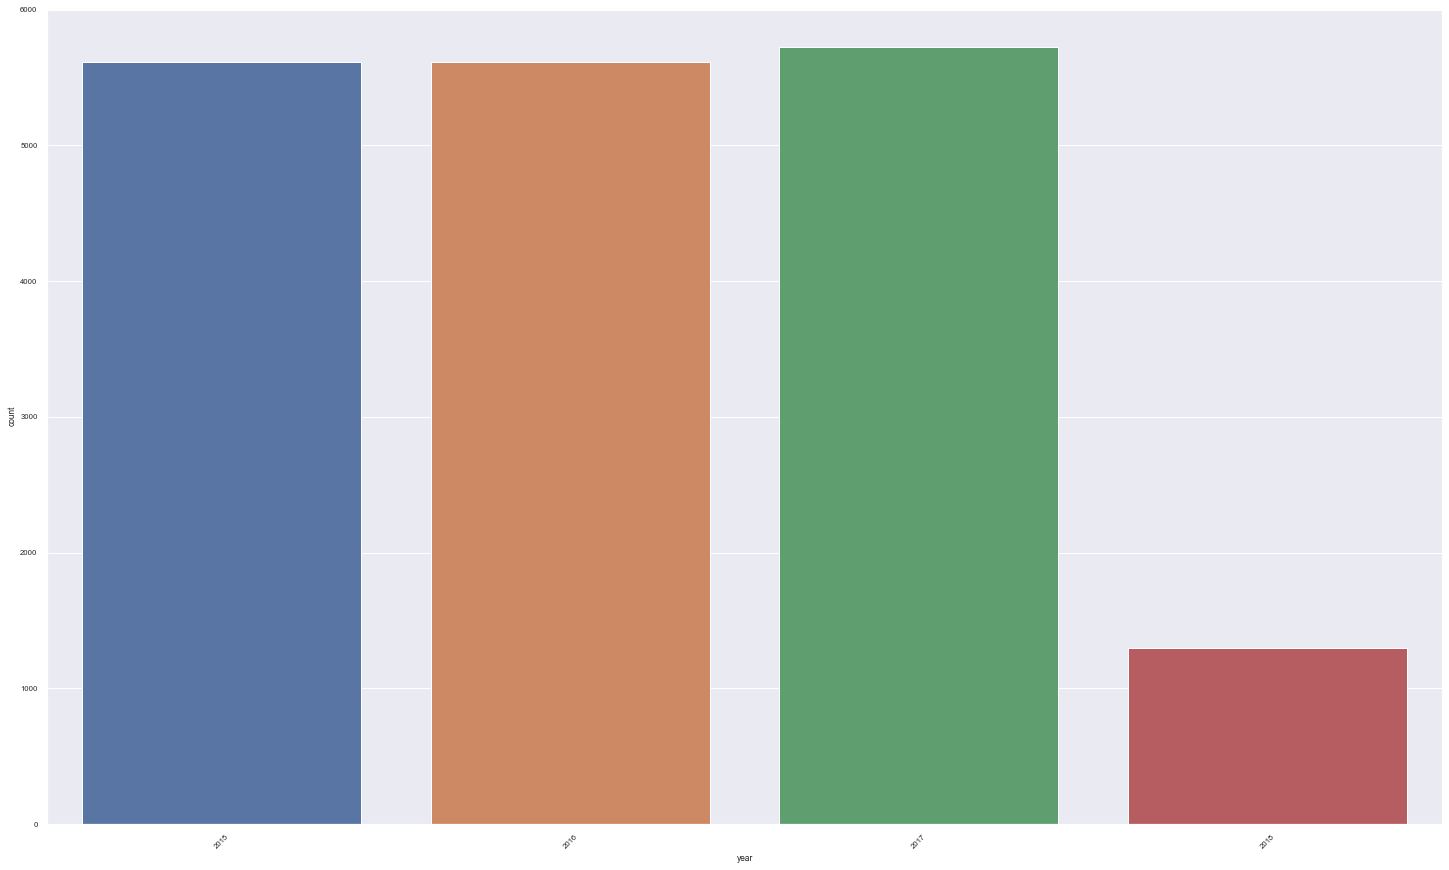

In [48]:
sns.set(font_scale = 0.7)
plt.figure(figsize = [25,15])
sns.countplot(x = 'year', data = avocado_df)
plt.xticks(rotation =45)

Let us see how the distribution looks with respect to the type of the avocados

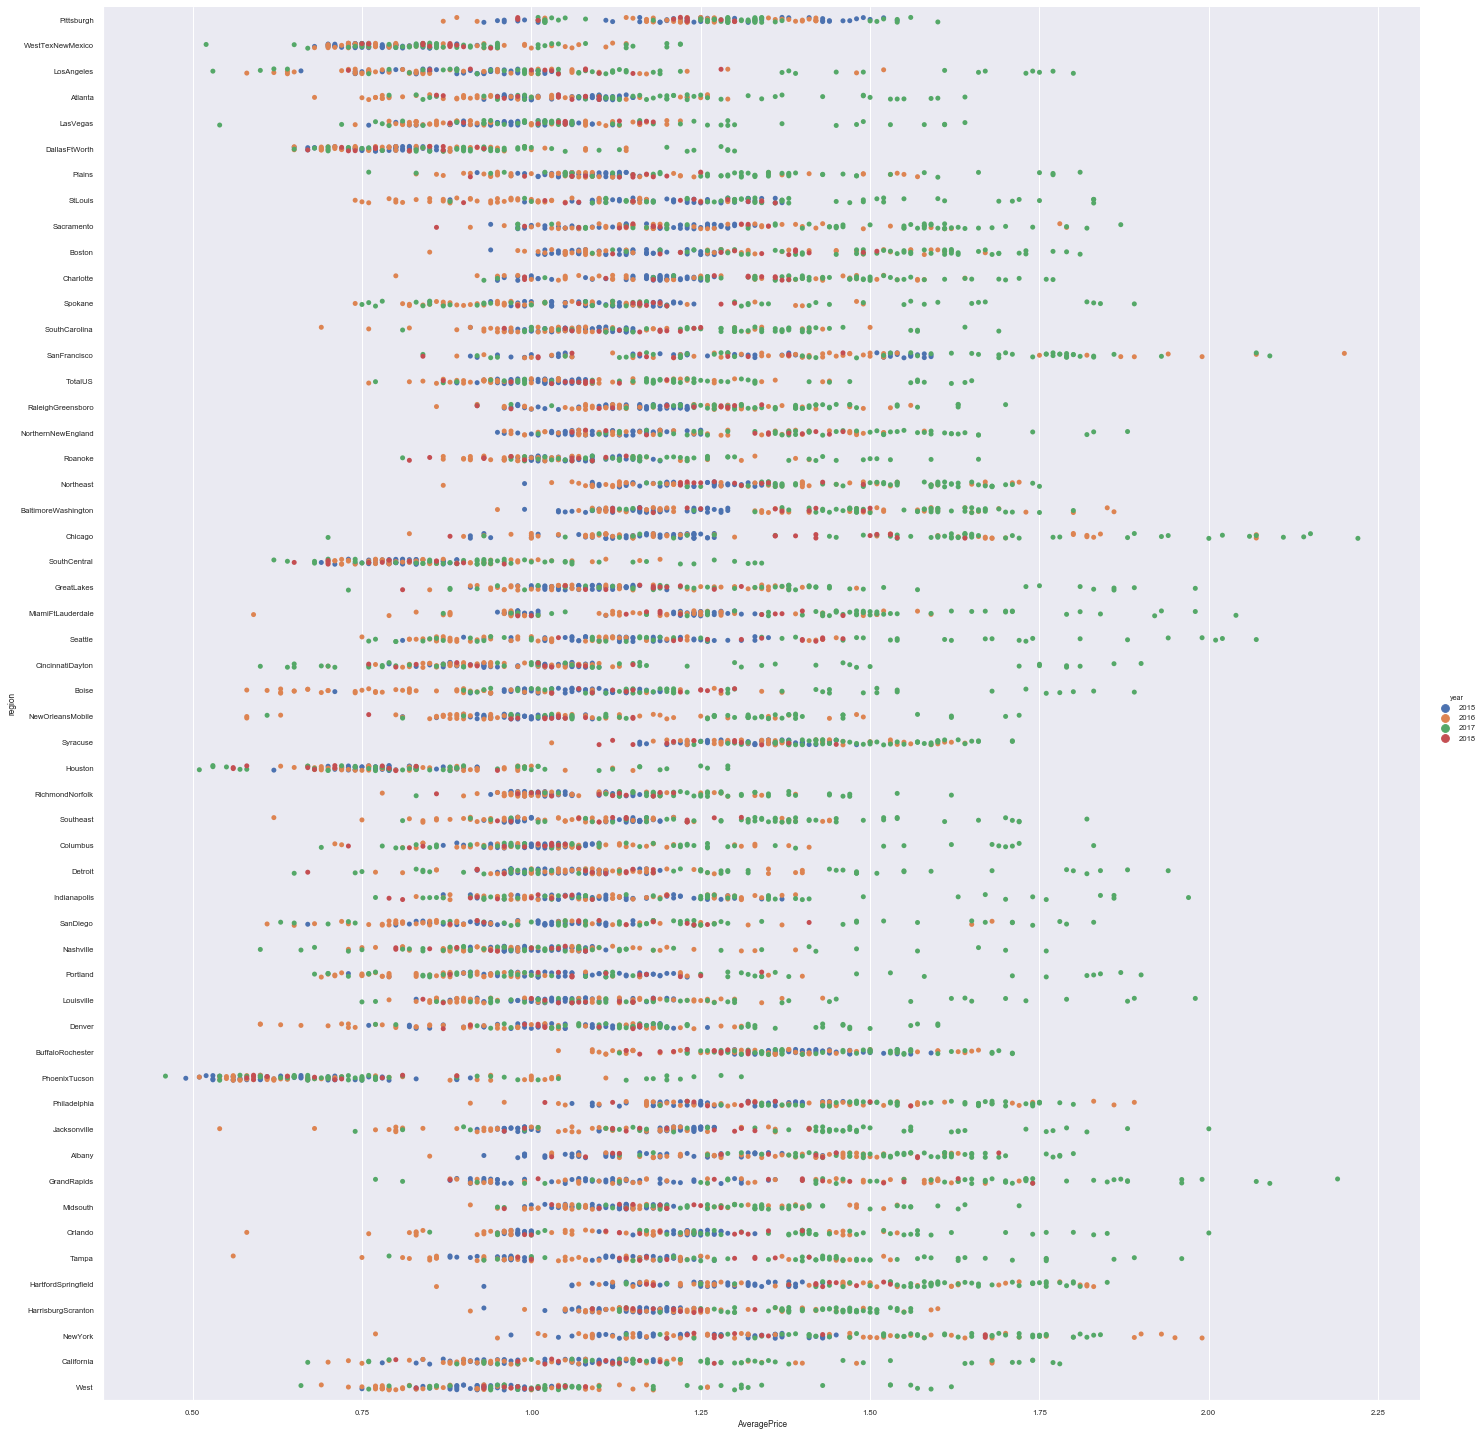

In [49]:
#plot avocado prices vs. regions for conventional avocados
conventional = sns.catplot('AveragePrice','region', data = avocado_df[avocado_df['type'] == 'conventional'], hue = 'year', height = 20)

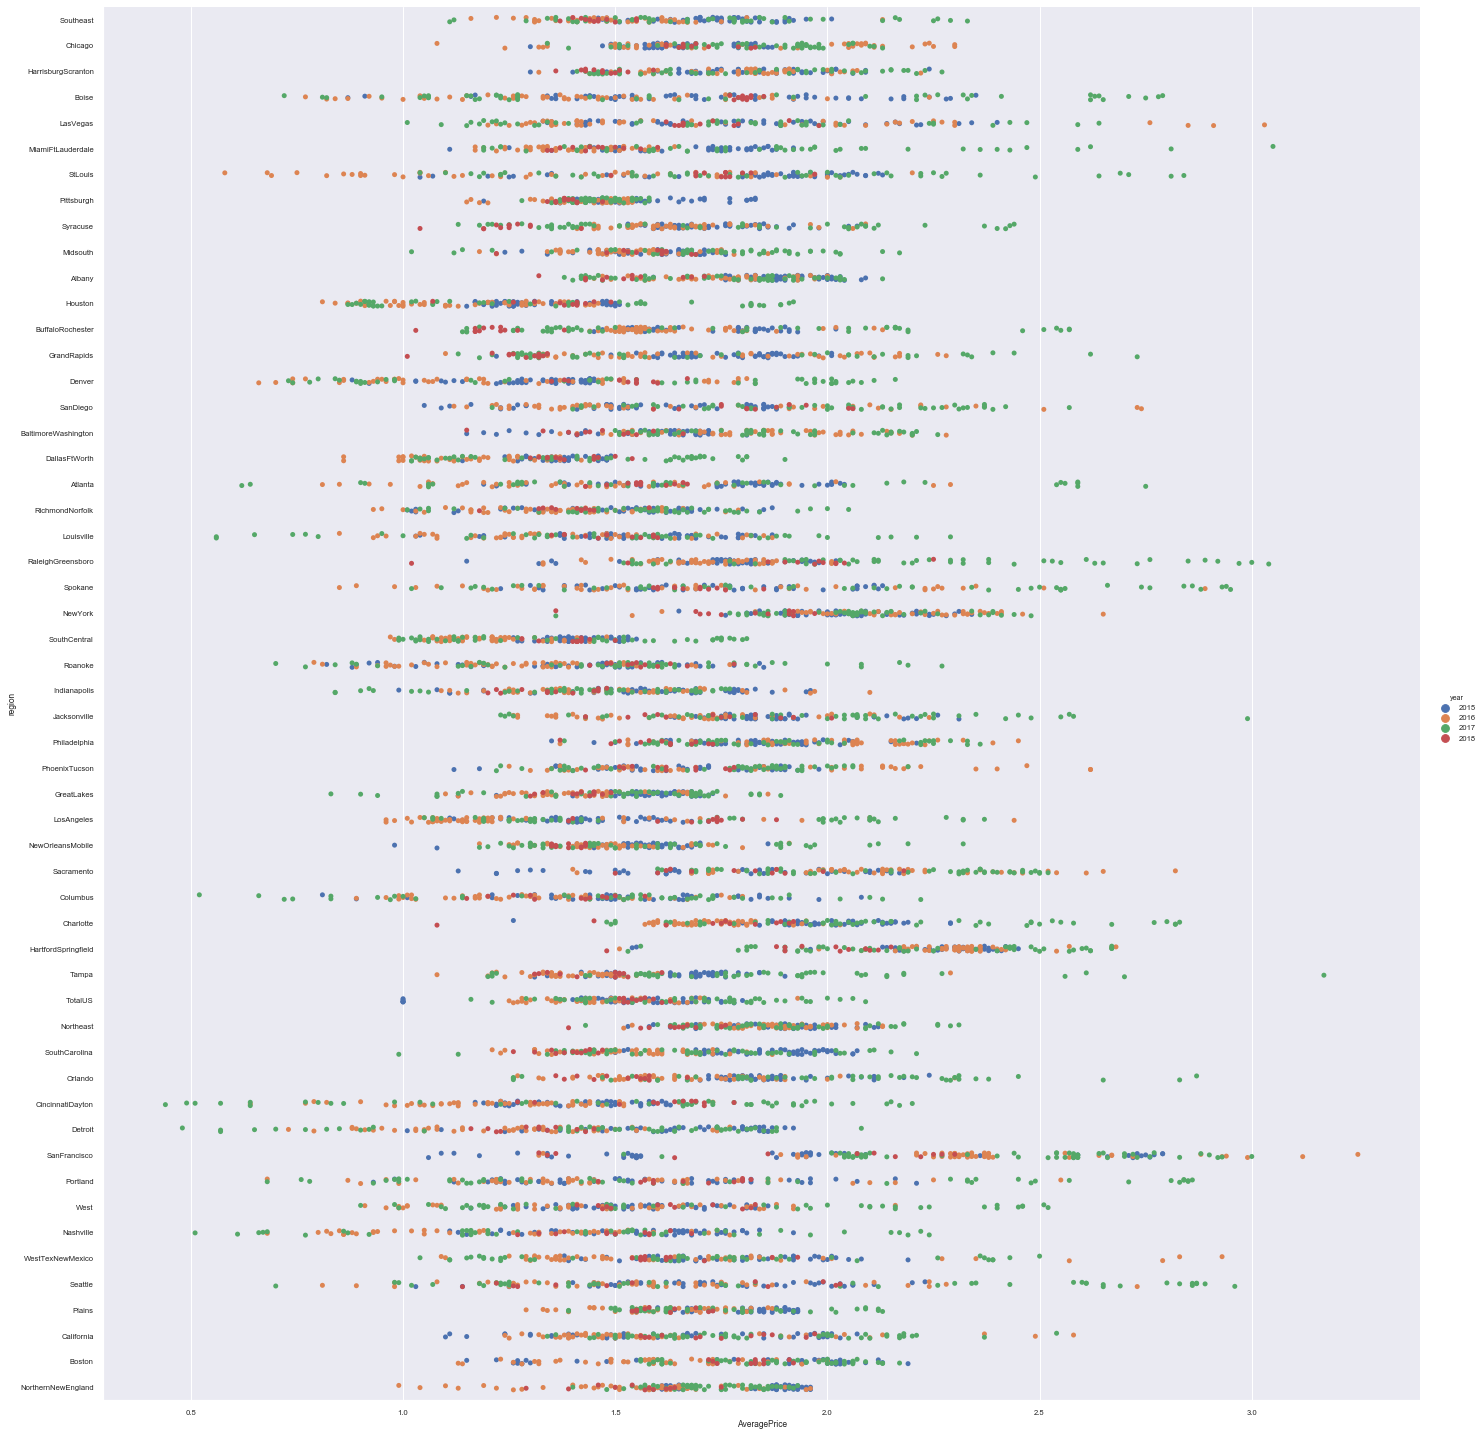

In [50]:
#plot avocado prices vs. regions for organic avocados
conventional = sns.catplot('AveragePrice','region', data = avocado_df[avocado_df['type'] == 'organic'], hue = 'year', height = 20)

### Prepare the data for applying Facebook Prophet

We need only the AveragePrice column and the dates column for using the Prophet tool

In [51]:
avocado_prophet = avocado_df[['Date','AveragePrice']]

In [52]:
avocado_prophet

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


The Prophet tool is easy to use as not much data cleaning is required. 

In order to make the data frame ready for applying the Prophet model, we need to just rename the columns in the following way:

In [53]:
avocado_prophet= avocado_prophet.rename(columns = {'Date': 'ds', 'AveragePrice':'y'})

In [54]:
avocado_prophet

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


### Developing the Forecasting model and making the predictions

In [58]:
m = Prophet.Prophet()
m.fit(avocado_prophet)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


We are setting the 'periods' parameter to 365 in order to obtan the predictions for the next year. 

In [61]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [62]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.497917,0.884218,1.887499,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
1,2015-01-04,1.497917,0.864500,1.903427,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
2,2015-01-04,1.497917,0.894222,1.858843,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
3,2015-01-04,1.497917,0.927378,1.894040,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
4,2015-01-04,1.497917,0.901050,1.851056,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,2019-03-21,1.161737,0.574592,1.561687,0.995397,1.358445,-0.086289,-0.086289,-0.086289,-0.086289,-0.086289,-0.086289,0.0,0.0,0.0,1.075448
18610,2019-03-22,1.161007,0.559259,1.581935,0.993769,1.359174,-0.084622,-0.084622,-0.084622,-0.084622,-0.084622,-0.084622,0.0,0.0,0.0,1.076384
18611,2019-03-23,1.160276,0.527337,1.612433,0.992140,1.359904,-0.082682,-0.082682,-0.082682,-0.082682,-0.082682,-0.082682,0.0,0.0,0.0,1.077594
18612,2019-03-24,1.159545,0.552266,1.628783,0.990531,1.360633,-0.080489,-0.080489,-0.080489,-0.080489,-0.080489,-0.080489,0.0,0.0,0.0,1.079056


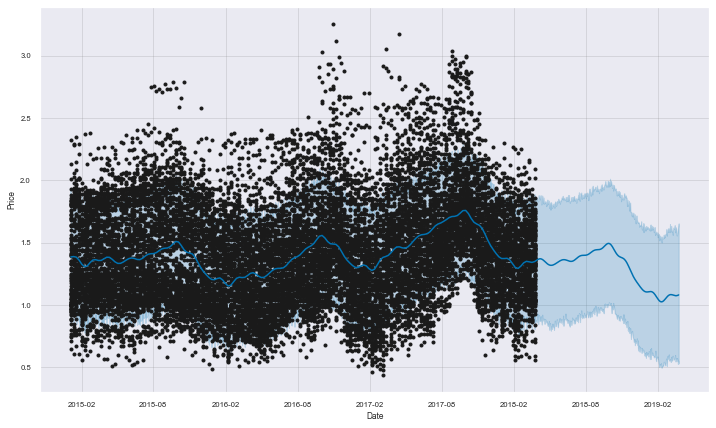

In [64]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

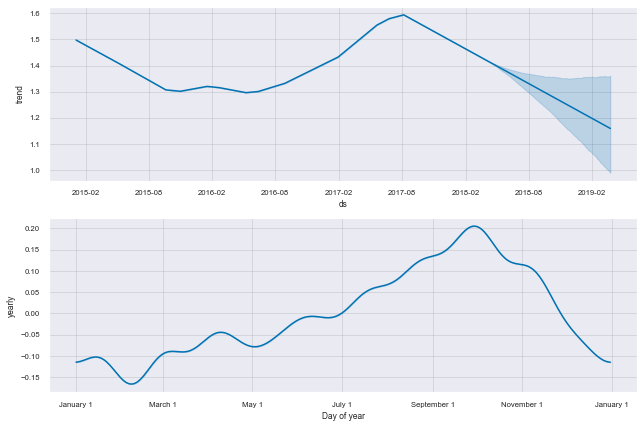

In [65]:
fig2 = m.plot_components(forecast)

From the above visualisations we can observe that the average price of the avocados will drop in the upcoming year.

### Region specific predictions

Let us observe how the prices vary in the forecast with respect to specific regions.

#### Region: West

In [66]:
avocado_df = pd.read_csv('avocado.csv')

In [68]:
avocado_df_example = avocado_df[avocado_df['region'] == 'West']

In [69]:
avocado_df_example = avocado_df_example.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


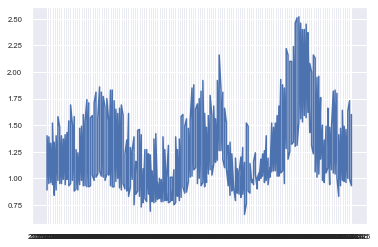

In [70]:
plt.plot(avocado_df_example['Date'],avocado_df_example['AveragePrice'])

In [71]:
avocado_df_example= avocado_df_example.rename(columns = {'Date': 'ds', 'AveragePrice':'y'})

In [72]:
m = Prophet.Prophet()
m.fit(avocado_df_example)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [74]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.252665,0.637800,1.487435,1.252665,1.252665,-0.186079,-0.186079,-0.186079,-0.186079,-0.186079,-0.186079,0.0,0.0,0.0,1.066587
1,2015-01-04,1.252665,0.627915,1.484450,1.252665,1.252665,-0.186079,-0.186079,-0.186079,-0.186079,-0.186079,-0.186079,0.0,0.0,0.0,1.066587
2,2015-01-11,1.251599,0.646930,1.532217,1.251599,1.251599,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,0.0,0.0,0.0,1.084932
3,2015-01-11,1.251599,0.622111,1.533616,1.251599,1.251599,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,0.0,0.0,0.0,1.084932
4,2015-01-18,1.250532,0.644854,1.520158,1.250532,1.250532,-0.157509,-0.157509,-0.157509,-0.157509,-0.157509,-0.157509,0.0,0.0,0.0,1.093024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,2019-03-21,1.727219,1.114976,1.956293,1.702029,1.753782,-0.204562,-0.204562,-0.204562,-0.204562,-0.204562,-0.204562,0.0,0.0,0.0,1.522657
699,2019-03-22,1.727781,1.110278,1.970831,1.702373,1.754477,-0.199465,-0.199465,-0.199465,-0.199465,-0.199465,-0.199465,0.0,0.0,0.0,1.528316
700,2019-03-23,1.728343,1.074714,1.963318,1.702719,1.755131,-0.193802,-0.193802,-0.193802,-0.193802,-0.193802,-0.193802,0.0,0.0,0.0,1.534541
701,2019-03-24,1.728905,1.100546,1.955619,1.703074,1.755779,-0.187678,-0.187678,-0.187678,-0.187678,-0.187678,-0.187678,0.0,0.0,0.0,1.541226


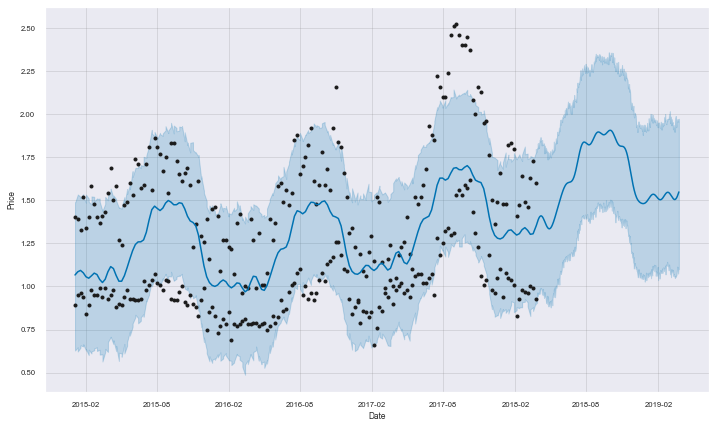

In [75]:
figure_west = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

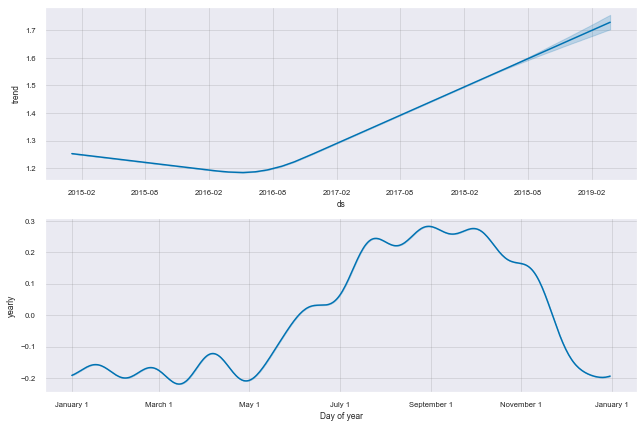

In [76]:
fig2_west = m.plot_components(forecast)

From the forecasted visualisations we can say that the prices show an increasing trend even though we observed a decresing trend when we considered the entire US.

#### Region: Chicago

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


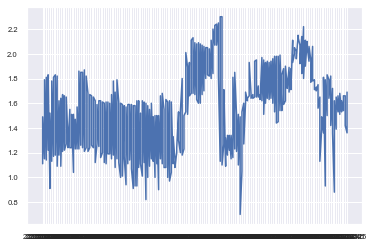

In [78]:
avocado_df = pd.read_csv('avocado.csv')
avocado_chicago = avocado_df[avocado_df['region'] == 'Chicago']
avocado_chicago = avocado_chicago.sort_values('Date')

plt.plot(avocado_chicago['Date'],avocado_chicago['AveragePrice'])

In [79]:
avocado_chicago = avocado_chicago.rename(columns = {'Date': 'ds', 'AveragePrice':'y'})

In [80]:
m = Prophet.Prophet()
m.fit(avocado_chicago)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [81]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [82]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.363644,0.842633,1.551045,1.363644,1.363644,-0.169535,-0.169535,-0.169535,-0.169535,-0.169535,-0.169535,0.0,0.0,0.0,1.194109
1,2015-01-04,1.363644,0.856912,1.538237,1.363644,1.363644,-0.169535,-0.169535,-0.169535,-0.169535,-0.169535,-0.169535,0.0,0.0,0.0,1.194109
2,2015-01-11,1.365585,0.955819,1.632666,1.365585,1.365585,-0.065030,-0.065030,-0.065030,-0.065030,-0.065030,-0.065030,0.0,0.0,0.0,1.300556
3,2015-01-11,1.365585,0.948008,1.635037,1.365585,1.365585,-0.065030,-0.065030,-0.065030,-0.065030,-0.065030,-0.065030,0.0,0.0,0.0,1.300556
4,2015-01-18,1.367527,0.963668,1.656459,1.367527,1.367527,-0.057839,-0.057839,-0.057839,-0.057839,-0.057839,-0.057839,0.0,0.0,0.0,1.309688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,2019-03-21,1.947998,1.498630,2.207726,1.942532,1.954090,-0.111096,-0.111096,-0.111096,-0.111096,-0.111096,-0.111096,0.0,0.0,0.0,1.836902
699,2019-03-22,1.948408,1.472829,2.183553,1.942916,1.954530,-0.105468,-0.105468,-0.105468,-0.105468,-0.105468,-0.105468,0.0,0.0,0.0,1.842940
700,2019-03-23,1.948817,1.494870,2.207385,1.943301,1.954969,-0.098886,-0.098886,-0.098886,-0.098886,-0.098886,-0.098886,0.0,0.0,0.0,1.849932
701,2019-03-24,1.949227,1.499696,2.211087,1.943685,1.955408,-0.091507,-0.091507,-0.091507,-0.091507,-0.091507,-0.091507,0.0,0.0,0.0,1.857720


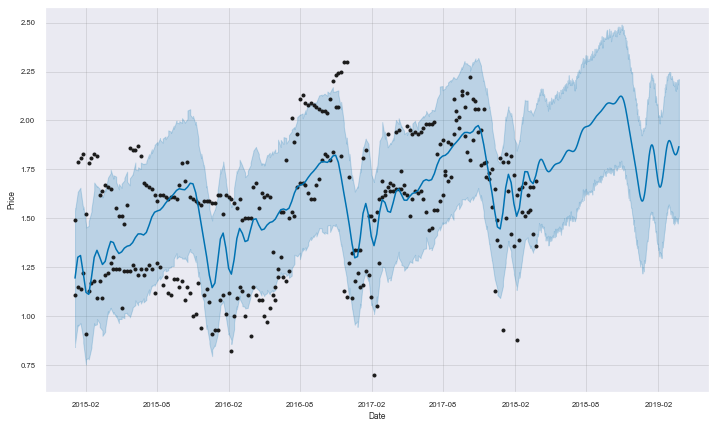

In [83]:
figure_chicago = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

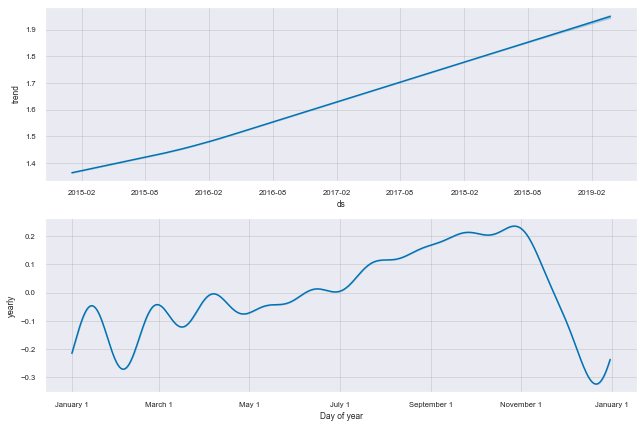

In [84]:
fig2_chicago = m.plot_components(forecast)

### Conclusion

The forecast can be done on other regions too and the prices for the upcoming year can be predicted.
